In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import time
import copy
import math
from sklearn.decomposition import PCA
import itertools
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.manifold import TSNE
from scipy.stats import nct
from scipy.stats import chi2
from scipy.stats import skewnorm
from sklearn.utils import shuffle
%load_ext rpy2.ipython

OSError: cannot load library '/Users/wendy/opt/anaconda3/lib/R/lib/libR.dylib': dlopen(/Users/wendy/opt/anaconda3/lib/R/lib/libR.dylib, 2): Library not loaded: @rpath/libreadline.6.2.dylib
  Referenced from: /Users/wendy/opt/anaconda3/lib/R/lib/libR.dylib
  Reason: image not found

In [2]:
n_samples = 500
p = 2
k = 3

#normally distributed clusters
def sim1_fun(p,k,n_samples):
    mu = np.zeros(p*k)
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=n_samples)
        sample[:,i] = sample_i
        mu[i] = mu_i
    sample1 = np.zeros((n_samples*k,p))
    mu1 = np.zeros((k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
        mu1[(j-1),:] = mu[p*(j-1):p*j] + 2*(j-1)
    return(sample1)

#asymmetric normal distribution
def sim2_fun(p,k,n_samples):
    tau = np.zeros(p*k)
    sample = np.zeros((n_samples,p*k))
    #tau = np.zeros(p*k)
    for i in range(0,p*k):
        tau_i = np.random.uniform(0.1,0.9)
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(0, scale=5, size=n_samples)
        s_co = co_fun(tau_i,sample_i)+ mu_i
        sample[:,i] = s_co
        tau[i] = tau_i
    sample1 = np.zeros((n_samples*k,p))
    tau1 = np.zeros((k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]+ (-1)**(j)*7*(j-1)
        tau1[(j-1),:] = tau[p*(j-1):p*j]
    return(sample1)

#beta distribution
def sim3_fun(p,k,n_samples):
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        a_i = np.random.randint(1, 10)
        b_i = np.random.randint(11, 20)
        if i%2 != 0:
            sample_i = np.random.beta(a_i, b_i, size=n_samples)
        else:
            sample_i = np.random.beta(b_i, a_i, size=n_samples)
        sample[:,i] = sample_i
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]
    return(sample1)

#F-distributed
def sim5_fun(p,k,n_samples):
    a1 = [60,10,50]
    a2 = [60,10,25]
    a3 = [30,60,10]
    a4 = [30,60,70]
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = np.random.f(a1[0],a3[0], size= n_samples)+1
        if i%(2*k) == 1:
            sample[:,i] = np.random.f(a1[1],a3[1], size= n_samples)-2
        if i%(2*k) == 2:
            sample[:,i] = np.random.f(a1[2],a3[2], size= n_samples)
        if i%(2*k) == 3:
            sample[:,i] = np.random.f(a2[0],a4[0], size= n_samples)+1
        if i%(2*k) == 4:
            sample[:,i] = np.random.f(a2[1],a4[1], size= n_samples)+1
        if i%(2*k) == 5:
            sample[:,i] = np.random.f(a2[2],a4[2], size= n_samples)   
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)


#skew-t distribution
def sim6_fun(p,k,n_samples):
    df = [10, 10, 10]
    nc = [3, -1.5, 2.5]
    loc = [np.random.uniform(0.1,0.5), np.random.uniform(1.5,2.5), np.random.uniform(0.5,1.5), np.random.uniform(0.3,0.8), np.random.uniform(1.5,2.5)]
    scale= 0.5
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = nct.rvs( df[0], nc[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 1:
            sample[:,i] = nct.rvs( df[1], nc[1], loc[1], scale, size=n_samples)
        if i%(2*k) == 2:
            sample[:,i] = nct.rvs( df[2], nc[2], loc[2], scale, size=n_samples)
        if i%(2*k) == 3:
            sample[:,i] = nct.rvs( df[0], nc[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 4:
            sample[:,i] = nct.rvs( df[1], nc[1], loc[3], scale, size=n_samples)
        if i%(2*k) == 5:
            sample[:,i] = nct.rvs( df[2], nc[2], loc[4], scale, size=n_samples)   
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)

#Chi square distribution
def sim7_fun(p,k,n_samples):
    df = [4, 5, 3]
    loc = [0, 4, 3, -1.5]
    scale= 0.5
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = chi2.rvs( df[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 1:
            sample[:,i] = chi2.rvs( df[1], loc[1], scale, size=n_samples)
        if i%(2*k) == 2:
            sample[:,i] = chi2.rvs( df[2], loc[2], scale, size=n_samples)
        if i%(2*k) == 3:
            sample[:,i] = chi2.rvs( df[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 4:
            sample[:,i] = chi2.rvs( df[1], loc[3], scale, size=n_samples)
        if i%(2*k) == 5:
            sample[:,i] = chi2.rvs( df[2], loc[2], scale, size=n_samples)  
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)

In [3]:
#another F-distribution 
def sim4_fun(p,k,n_samples):
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p):
        a_i = np.random.randint(51, 60)
        b_i = np.random.randint(21, 30)
        if i%2 != 0:
            sample_i = np.random.f(a_i, a_i, size=n_samples)+1
        else:
            sample_i = np.random.f(b_i, b_i, size=n_samples)+1
        sample[:,i] = sample_i
    for i in range(p,p*(k-1)):
        a_i = np.random.randint(5, 15)
        b_i = np.random.randint(25,35)
        if i%2 != 0:
            sample_i = np.random.f(b_i, b_i, size=n_samples)
        else:
            sample_i = np.random.f(a_i, a_i, size=n_samples)
        sample[:,i] = sample_i
    for i in range(p*(k-1),p*k):
        a_i = np.random.randint(15, 25)
        b_i = np.random.randint(60, 70)
        if i%2 != 0:
            sample_i = np.random.f(a_i, b_i, size=n_samples)
        else:
            sample_i = np.random.f(a_i, b_i, size=n_samples)+2.2
        sample[:,i] = sample_i
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]
    return(sample1)

In [4]:
#normal distribution with different sample sizes
p = 50
k1 = 500
k2 = 500
k3 = 500
def sim8_fun(p,k1,k2,k3):
    n_samples = [k1,k2,k3]
    k = len(n_samples)
    mu = np.zeros(p*k)
    sample = np.zeros((sum(n_samples),p))
    for i1 in range(k1*p):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k1)
    sample[:k1,:] = sample_i-2
    for i2 in range(k2):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k2)
    sample[k1:(k1+k2),:] = sample_i
    for i3 in range(k3):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k3)
    sample[k2:(k2+k3),:] = sample_i+2
    mu1 = np.zeros((k,p))
    for j in range(len(n_samples)):
        sample1[j-1:j,:] = sample[j-1:j,:] + 2*(j-1)
        mu1[(j-1),:] = mu[p*(j-1):p*j] + 2*(j-1)
    return(sample)

In [5]:
def co_fun(tau,s):
    num_lef =  2*math.sqrt(tau)
    num_rig =  2*math.sqrt(1-tau)
    deno = math.sqrt(tau) + math.sqrt(1-tau)
    s_co = copy.deepcopy(s)
    for i in range(len(s)):
        if s[i]< 0:
            s_co[i] = num_lef/deno * (1/math.sqrt(1-tau)) * s[i]
        else:
            s_co[i] = num_rig/deno * (1/math.sqrt(tau)) * s[i]
            i = i+1
    return s_co

In [96]:
#skew norm distribution
n_samples = 500
p = 2
k = 3

#normally distributed clusters
def sim9_fun(p,k,n_samples):
    mu = np.zeros(p*k)
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        mu_i = np.random.randint(0, 10)
        #a_i = np.random.randint(0, 10)
        a_i = 15
        skewnorm.rvs(a=a_i, loc=mu_i, scale=2, size=n_samples)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=n_samples)
        sample[:,i] = sample_i
        mu[i] = mu_i
    sample1 = np.zeros((n_samples*k,p))
    mu1 = np.zeros((k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 3*(j-1)
        mu1[(j-1),:] = mu[p*(j-1):p*j] + 3*(j-1)
    return(sample1)

In [64]:
%%R
library(mvtnorm)
require(mixsmsn)
library(mixsmsn)



Error: package or namespace load failed for ‘mvtnorm’ in library.dynam(lib, package, package.lib):
 shared object ‘mvtnorm.dylib’ not found


In [47]:
p=50
k=3 
n_samples=500
X = sim9_fun(p,k,n_samples)
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
clusters2 = kmeans.labels_
#%R install.packages('mixsmsn')
%R require(mixsmsn)
%R -i X
%R -i k
%R sknorm = smsn.mmix(X, nu=3, g=k, get.init = TRUE, criteria = TRUE, group = TRUE, family = "Skew.normal")
%R c_sknorm = sknorm[["group"]]
%R -o sknorm


Error in smsn.mmix(X, nu = 3, g = k, get.init = TRUE, criteria = TRUE,  : 
  could not find function "smsn.mmix"

Error in withVisible({ : object 'sknorm' not found


/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: mixsmsn

  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Failed with error:  
  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ‘package ‘mvtnorm’ required by ‘mixsmsn’ could not be found’
  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/wendy/anaconda3/lib/python3.7/site-pa

LookupError: 'sknorm' not found

In [84]:
p=50
k=3 
n_samples=500
X = sim9_fun(p,k,n_samples)

In [98]:
p=10
k=3 
n_samples=100
#def sim_clu(n_samples,p,k):
y = np.zeros(n_samples*k)
y[(n_samples+1):n_samples*(k-1)]=1
y[(n_samples*(k-1)+1):n_samples*k]=2
r = 10
ari = np.zeros((8,r))
X_all = np.zeros((n_samples*k,p))
for i in range(r):
    X = sim9_fun(p,k,n_samples)
    #X = PCA(n_components=20).fit_transform(X_ini)
    #X = TSNE(n_components=3).fit_transform(X)
#k-expectile
    C1, clusters1 = k_expectile_vtau_c(X, 3, 100)
    ari[0,i] = metrics.adjusted_rand_score(y, clusters1)
#k-means
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    clusters2 = kmeans.labels_
    ari[1,i] = metrics.adjusted_rand_score(y, clusters2)
#spectral
    spectral = SpectralClustering(n_clusters=k)
    spectral.fit(X)
    clusters3 = spectral.labels_
    ari[2,i] = metrics.adjusted_rand_score(y, clusters3)
#hierarcicel
    wald = AgglomerativeClustering(n_clusters=k, linkage='ward')
    wald.fit(X)
    clusters4 = wald.labels_
    ari[3,i] = metrics.adjusted_rand_score(y, clusters4)
#quantile
    #%R require('QuClu')
    #%R -i X
    #%R -i p
    #%R qclu1 = alg.CS(X, k = 3, eps = 1e-08, it.max = 30, B = 30, lambda = rep(1,p))
    #%R qclu2 = alg.CU(X, k = 3, eps = 1e-08, it.max = 30, B = 30)
    #%R qclu3 = alg.VS(X, k = 3, eps = 1e-08, it.max = 30, B = 30, lambda = rep(1,p))
    #%R qclu4 = alg.VU(X, k = 3, eps = 1e-08, it.max = 30, B = 30)
    #%R c1 = qclu1$cl
    #%R c2 = qclu2$cl
    #%R c3 = qclu3$cl
    #%R c4 = qclu4$cl
    #%R -o c1
    #%R -o c2
    #%R -o c3
    #%R -o c4
    #c1 = np.array(c1)-1
    #c2 = np.array(c2)-1
    #c3 = np.array(c3)-1
    #c4 = np.array(c4)-1
    #ari[4,i] = metrics.adjusted_rand_score(y, c1)
    #ari[5,i] = metrics.adjusted_rand_score(y, c2)
    #ari[6,i] = metrics.adjusted_rand_score(y, c3)
    #ari[7,i] = metrics.adjusted_rand_score(y, c4)
#skew-norm mixture model
    #%R require('mixsmsn')
    #%R library(mixsmsn)
    #%R -i X
    #%R -i k
    #%R sknorm = smsn.mmix(X, nu=4, g=k, get.init = TRUE, criteria = TRUE, group = TRUE, family = "Skew.normal")
    #%R c_sknorm = sknorm[["group"]]
    #%R -o c_sknorm
    #ari[8,i] = metrics.adjusted_rand_score(y, c_sknorm)
    X_all = np.append(X_all,X,axis =1)
X_all = np.delete(X_all, slice(0, p), 1)
pd.DataFrame(X_all).to_csv('X_all.csv')
ari_m, ari_s = np.mean(ari,axis =1)*100,np.std(ari,axis =1)
rou = lambda x: round(x, 2)
rou_v = np.vectorize(rou)
rou1 = lambda x: round(x, 3)
rou_v1 = np.vectorize(rou1)
#print(n_samples*k,p, rou_v(acc_m),rou_v1(acc_s),rou_v(ari_m),rou_v1(ari_s)) 
print(n_samples*k,p,rou_v(ari_m),rou_v1(ari_s)) 

300 10 [97.99 97.99 15.09 97.5   0.    0.    0.    0.  ] [0.    0.    0.318 0.009 0.    0.    0.    0.   ]


In [33]:
X = sim9_fun(p,k,n_samples)
X1 = sim9_fun(p,k,n_samples)

In [37]:
np.shape(X_all)

(300, 2)

In [30]:
p

2

In [34]:
X_all = np.append(X,X1,axis =1)

In [36]:
X_all =np.delete(X_all, slice(0, p), 1)

In [6]:
def tau_var(points, tau, mu):
    res = points - mu
    neg = np.array([res<0],dtype=np.int32)
    pos = np.array([res>=0],dtype=np.int32)
    w_pos = pos * tau
    w_neg = neg * (1-tau)
    dist = (res ** 2 * w_pos).sum(axis = res.ndim) + (res ** 2 * w_neg).sum(axis = res.ndim)
    var = dist.sum(axis = dist.ndim-1)
    return var

def cal_W(x, clusters, centroid, tau, k):
    g_var = 0
    for d in range(k):
        points = [x[i] for i in range(len(x)) if clusters[i] == d]
        var = tau_var(points, tau[d], centroid[d])
        g_var = g_var + var
    return g_var

W =  list()
for j in range(1,12):
    C1, clusters1, tau1 = k_expectile_vtau_c(X,j)
    w = cal_W(X, clusters1, C1, tau1, j)
    #print(w)
    W.append(float(w))

In [9]:
p = len(X[1])
KL =  list()
for k in range(1,10):
    diff_k = (k)**(p/2)*W[k-1]-(k+1)**(p/2)*W[k]
    diff_k1 = (k+1)**(p/2)*W[k]-(k+2)**(p/2)*W[k+1]
    kl = abs(diff_k/diff_k1)
    print(kl)
    KL.append(kl)

2.302364094971714e-09
5.69680298714056e-07
1.437295900946909e-05
0.0001105026416078385
0.0004518214034511307
0.0012672778165599625
0.002786710055629403
0.005181661984861915
0.00858794078330631


In [10]:
n = len(X)
H =  list()
for k in range(1,10):
    h = (W[k-1]/W[k]-1)/(n-k-2)
    print(h)
    H.append(h)

0.00025000114176113063
0.00031285885353935395
3.966592555500272e-06
4.703058315034339e-06
3.7011348218695247e-06
3.3388106853321244e-06
3.2743805272510527e-06
3.1880190842074223e-06
2.0178312372967445e-06


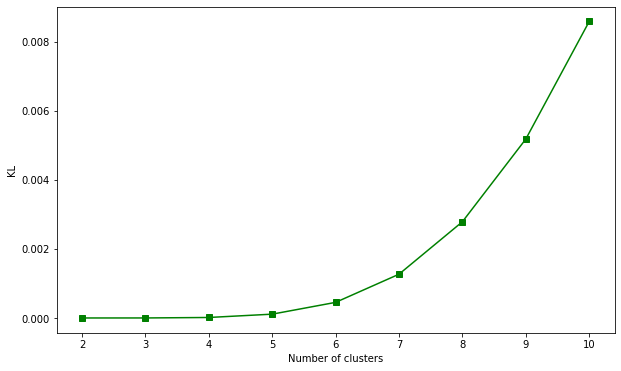

In [12]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(range(2,11), KL,'g-s')
plt.xlabel('Number of clusters')
plt.ylabel('KL')
plt.savefig('KL_score.png',transparent=True)

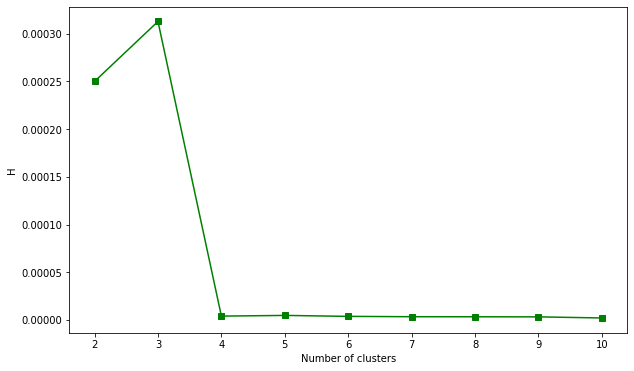

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(range(2,11), H,'g-s')
plt.xlabel('Number of clusters')
plt.ylabel('H')
plt.savefig('H_score.png',transparent=True)

In [14]:
from sklearn import metrics
DB =  list()
silhouette =  list()
for k in range(2,15):
    C_c1, clusters1,tau1 = k_expectile_vtau_c(X,k)
    s1 = metrics.silhouette_score(X, clusters1, metric='euclidean')
    print(s1)
    s2 = metrics.davies_bouldin_score(X, clusters1)
    print(s2)
    DB.append(s2)
    silhouette.append(s1)

0.28252672642026816
1.3908742887675412
0.35776238112805964
1.1744731733845803
0.24261339756907485
4.366757959275046
0.13055654506289427
6.568397795780318
0.013042897821362842
8.070747670783144
0.0135697847806747
7.522826730006137
0.01281027081791194
7.267809632218295
0.011625836517840743
7.051517958529101
0.010875528056863018
6.799286263921127
0.011991043076381942
6.625413069281463
0.011784705316852865
6.509472902404248
0.009931350154188195
6.279031506974576
0.011673792621515069
6.187016573275014


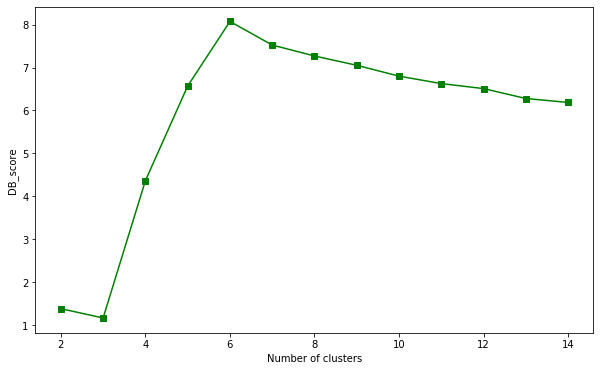

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(range(2,15), DB,'g-s')
plt.xlabel('Number of clusters')
plt.ylabel('DB_score')
plt.savefig('DB_score.png',transparent=True)

In [22]:
p=50
k=3 
n_samples=100
#def sim_clu(n_samples,p,k):
y = np.zeros(n_samples*k)
y[(n_samples+1):n_samples*(k-1)]=1
y[(n_samples*(k-1)+1):n_samples*k]=2
#y = blobs[1]
r = 10
acc = np.zeros(r)
ari = np.zeros(r)
for i in range(r):
    X = sim1_fun(p,k,n_samples)
    #X = PCA(n_components=20).fit_transform(X_ini)
    #X = TSNE(n_components=3).fit_transform(X)
    #k-expectile
    #spectral
    spectral = SpectralClustering(n_clusters=k)
    spectral.fit(X)
    clusters3 = spectral.labels_
    acc[i] = cluster_index(clusters3,y,k)
    ari[i] = metrics.adjusted_rand_score(y, clusters3)
acc_m, acc_s = np.mean(acc)*100,np.std(acc)
ari_m, ari_s = np.mean(ari)*100,np.std(ari)
rou = lambda x: round(x, 2)
rou_v = np.vectorize(rou)
rou1 = lambda x: round(x, 3)
rou_v1 = np.vectorize(rou1)
print(n_samples*k,p, rou_v(acc_m),rou_v1(acc_s),rou_v(ari_m),rou_v1(ari_s))    

/Users/wendy/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/wendy/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/wendy/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/wendy/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embeddi

300 50 33.93 0.003 -0.01 0.0


In [6]:
#Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b, None)
#Tau-distance
def tau_dist_fun(x, centroid, tau):
    arr = x - centroid
    tau_ar = tau[None:,:]
    neg = np.array([arr<0],dtype=np.int32)
    pos = np.array([arr>=0],dtype=np.int32)
    w_pos = pos * tau_ar
    w_neg = neg * (1-tau_ar)
    dist = (arr ** 2 * w_pos).sum(axis = arr.ndim) + (arr ** 2 * w_neg).sum(axis = arr.ndim)
    return dist
#get centroids
def get_closest_centroid(x, centroid, tau):
    # Loop over each centroid and compute the distance from data point.
    dist = tau_dist_fun(x, centroid, tau)
    # Get the index of the centroid with the smallest distance to the data point
    assigned_centroids = np.argmin(dist, axis = 2)
    clusters = np.squeeze(assigned_centroids)
    return clusters
#Expectile estimation
def expectile_fun_c(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) != 0:
        res = group - e
        e = copy.deepcopy(e_new)
        neg = np.array([res<0],dtype = np.int32)
        pos = np.array([res>=0],dtype= np.int32)
        norm = pos.sum(axis=1)*tau + neg.sum(axis=1)*(1-tau)
        e_arr = (tau * (group * pos).sum(axis=1) + (1-tau) * (group * neg).sum(axis=1))/norm
        e_new = np.squeeze(e_arr)
    return e_new
#Estimate optimal taus
def tau_fun_c(group, e):
    res = group - e
    neg = np.array([res<0],dtype = np.int32)
    pos = np.array([res>=0],dtype= np.int32)
    neg_s = -(neg*res).sum(axis=1)/neg.sum(axis=1)
    pos_s = (pos*res).sum(axis=1)/pos.sum(axis=1)
    c = neg_s/pos_s
    tau = c/(1+c)
    return tau
# Define K expectile clustering 
# Main function
def k_expectile_vtau_c(X, k, ite):
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
# Initialize tau = 0.5
    tau = np.ones(C.shape)*0.5
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# main loop   
    for r in range(ite):
    #while error >= ite:
        # Get closest centroids to each data point
        assigned_clusters = get_closest_centroid(X[:, None, :], C[None,:, :], tau)
        # Storing the old centroid values
        C_old = copy.deepcopy(C)
        # Compute new centroids
        for c in range(k):
            # Get data points belonging to each cluster 
            cluster_members = X[assigned_clusters == c]
        
            # Compute the centroids of the clusters
            C[c] = expectile_fun_c(cluster_members, tau[c])
        
            # Update the tau
            tau[c] = tau_fun_c(cluster_members, C[c])
        error = dist(C, C_old)
        #print(tau)
        #print(error)
    return C, assigned_clusters

In [11]:
#matching cluster index
import itertools
def cluster_index(clusters, target, k):
    list_p = list(range(1,k+1,1))
    permu = list(itertools.permutations(list_p,k))
    new = np.zeros(clusters.shape)
    acc = np.zeros(len(permu))
    for i in range(len(permu)):
        for j in range(k):
            new[np.where(clusters == j)] = permu[i][j]-1
        acc[i] = np.sum(new == target)/len(target)
    index = permu[np.argmax(acc)]
    #print(index)
    return np.max(acc)

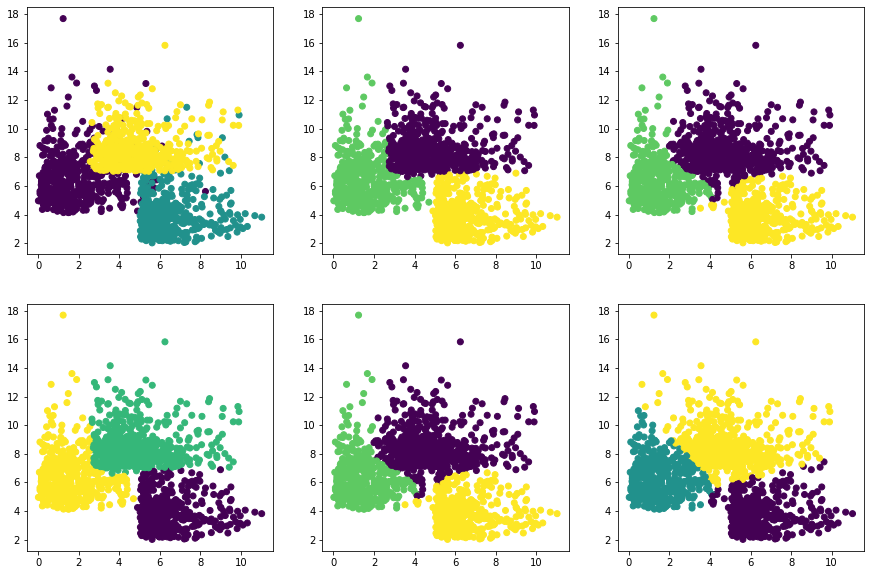

In [126]:
#X = blobs[0]
#y = blobs[1]
#y[(n_samples+1):n_samples*(k-1)]=1
#y[(n_samples*(k-1)+1):n_samples*k]=2
#y =y+1

%R require('QuClu')
%R -i X
%R -i p
%R qclu1 = alg.CS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
%R qclu2 = alg.CU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
%R qclu3 = alg.VS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
%R qclu4 = alg.VU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
%R c1 = qclu1$cl
%R c2 = qclu2$cl
%R c3 = qclu3$cl
%R c4 = qclu4$cl
%R -o c1
%R -o c2
%R -o c3
%R -o c4
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
c5 = kmeans.labels_
#C1, c5 = k_expectile_new(X, 3)
def cluster_index(clusters, target, k):
    list_p = list(range(1,k+1,1))
    permu = list(itertools.permutations(list_p,k))
    new = np.zeros(clusters.shape)
    acc = np.zeros(len(permu))
    for i in range(len(permu)):
        for j in range(k):
            new[np.where(clusters == j+1)] = permu[i][j]
        acc[i] = np.sum(new == target)/len(target)
    index = permu[np.argmax(acc)]
    #print(index)
    return index, np.max(acc)
index1,acc1 = cluster_index(c1,y,k)
index2,acc2 = cluster_index(c2,y,k)
index3,acc3 = cluster_index(c3,y,k)
index4,acc4 = cluster_index(c4,y,k)
index5,acc5 = cluster_index(c5,y,k)
new1 = np.zeros(len(c1))-1
new2 = np.zeros(len(c2))-1
new3 = np.zeros(len(c3))-1
new4 = np.zeros(len(c4))-1
new5 = np.zeros(len(c5))-1
for j in range(k):
    new1[np.where(c1 == j)] = index1[j]
for j in range(k):
    new2[np.where(c2 == j)] = index2[j]
for j in range(k):
    new3[np.where(c3 == j)] = index3[j]
for j in range(k):
    new4[np.where(c4 == j)] = index4[j]
for j in range(k):
    new5[np.where(c5 == j)] = index5[j]
    
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(231)
plt.scatter(X[:,0],X[:,1],c = y)
plt.subplot(232)
plt.scatter(X[:,0],X[:,1],c = new1)
plt.subplot(233)
plt.scatter(X[:,0],X[:,1],c = new2)
plt.subplot(234)
plt.scatter(X[:,0],X[:,1],c = new3)
plt.subplot(235)
plt.scatter(X[:,0],X[:,1],c = new4)
plt.subplot(236)
plt.scatter(X[:,0],X[:,1],c = new5)

In [48]:
r = skewnorm.rvs(11, size=1000)

No handles with labels found to put in legend.


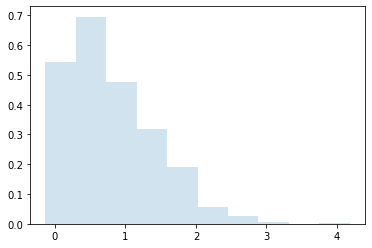

In [49]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [92]:
X = sim9_fun(10,k,n_samples)

In [39]:
np.shape(X)

(1500, 10)

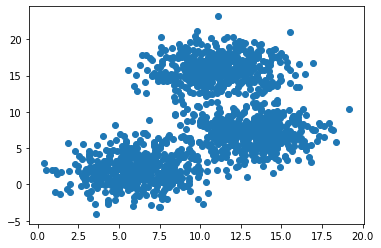

In [94]:
plt.scatter(X[:,1],X[:,2])